In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20  # 固定字体大小
plt.rcParams['font.sans-serif']=['SimSun'] # 用来正常显示中文标签，使用宋体
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

In [2]:
mnist = keras.datasets.mnist  # 载入
(train, train_y), (test, test_y) = mnist.load_data()  # 分解为训练数据和测试数据

In [3]:
print(train.shape)
print(test.shape)
print('像素范围：{} ~ {}'.format(np.min(train), np.max(train)))

(60000, 28, 28)
(10000, 28, 28)
像素范围：0 ~ 255


In [4]:
# 查看样本的label
print('label范围：{} ~ {}'.format(np.min(train_y), np.max(train_y)))

label范围：0 ~ 9


3


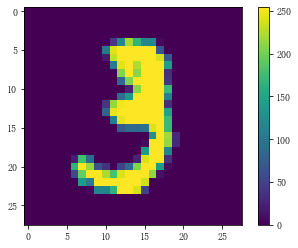

In [5]:
n = 10
print(train_y[n])
plt.imshow(train[n])
plt.colorbar()
plt.show()

In [6]:
train = train / 255
test = test / 255

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # input layer
    keras.layers.Dense(128, activation='relu'),    # hidden layer
    keras.layers.Dense(10, activation='softmax')  # output layer
])

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',  # 交叉熵
             metrics=['accuracy'])  # 准确率作为判断指标

In [9]:
model.fit(train, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2575 - accuracy: 0.9267
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1110 - accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0781 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0570 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0441 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0349 - accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0283 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0234 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0183 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.016

`loss, metrics = model.evaluate(x, y)` 返回根据测试数据计算出的 `loss value & metrics values`（损失值和模型评判指标）

In [10]:
loss, acc = model.evaluate(test, test_y)

313/313 [==============================] - 0s 753us/step - loss: 0.0817 - accuracy: 0.9778


### 预测结果
使用 `model.predict(test)` 可以得到最后一组的全部预测结果，输出结果为小数形式，我们只需找到最大的值对应的下标，即为模型预测的结果，使用 `np.argmax()` 即可得到最大值的下标. 

In [11]:
result = model.predict(test)  # 预测全部测试集据
print(model.predict(np.array([test[0]])))  # 预测一个测试样本的结果
print(np.argmax(result[0]))  # 获得最大值对应下标，即预测的结果
print('预测值：', np.argmax(result[0]))  # 输出对应的label类别

[[8.52470816e-10 1.49553614e-06 5.91789906e-08 5.66550943e-06
  1.05249224e-13 2.98108471e-09 1.42845447e-15 9.99991417e-01
  8.80496742e-09 1.20728191e-06]]
7
预测值： 7


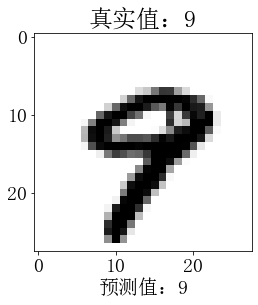

In [12]:
plt.rcParams['font.size'] = 20  # 固定字体大小
def check(n):
    predict = np.argmax(model.predict(test)[n])  # 返回预测值
    plt.imshow(test[n], cmap=plt.cm.binary)
    plt.title('真实值：' + str(test_y[n]))
    plt.xlabel('预测值：' + str(predict))
    plt.show()
check(9)

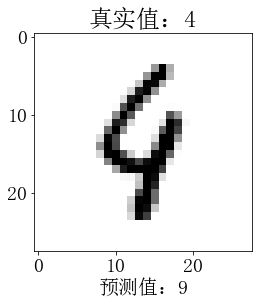

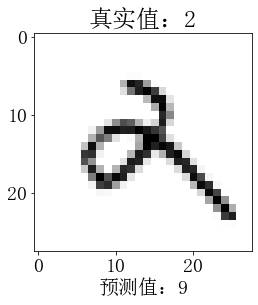

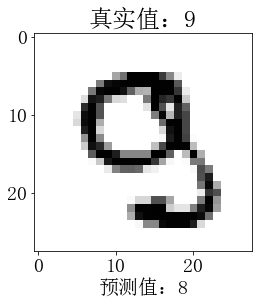

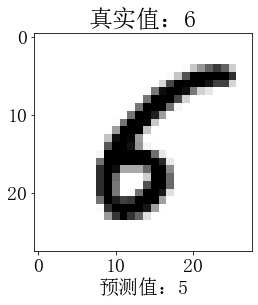

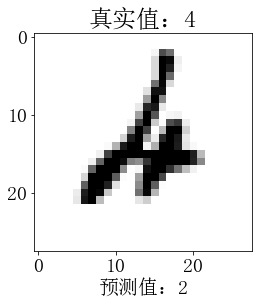

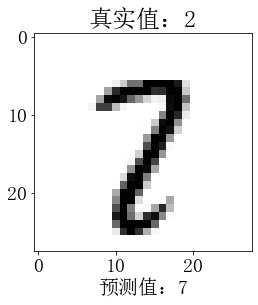

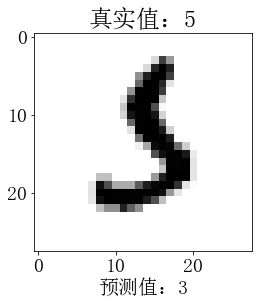

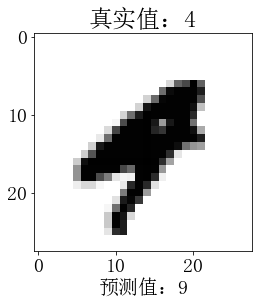

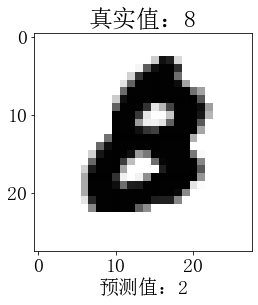

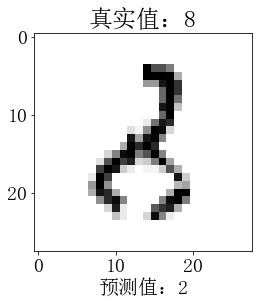

In [16]:
# 输出前10个错误预测结果
cnt = 10
result = model.predict(test)
for i in range(test.shape[0]):
    predict = np.argmax(result[i])
    if predict != test_y[i]:
        check(i)
        cnt -= 1
    if cnt == 0:
        break

### 自定义测试样本
可以通过画图工具修改目录下的 `test.png` 文件，用于自定义预测数据，看看能否识别自己写的数字！

In [14]:
from PIL import Image  # 用于转换图像

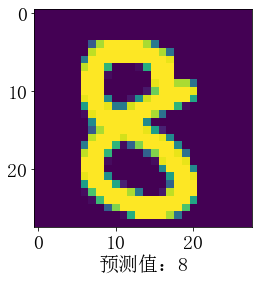

In [15]:
def my_test():
    image = Image.open('test.png')
    image = image.convert('L')
    mytest = np.array(image)
    mytest = 255 - mytest
    mytest = mytest.reshape(1, 28, -1)
    result = np.argmax(model.predict(mytest))
    plt.imshow(mytest[0])
    plt.xlabel('预测值：' + str(result))
    plt.show()

my_test()